In [46]:
from fmp_data import FMPPriceLoader
from sklearn.linear_model import LinearRegression

pl = FMPPriceLoader()

def beta(stock, index='^SPX', begin_date='2023-01-01', end_date='2023-12-31'):
    stock_price = pl.get_close_price_during(stock, begin_date, end_date)
    index_price = pl.get_close_price_during(index, begin_date, end_date)
    # Join the prices by date
    stock_dates = set(stock_price.keys())
    index_dates = set(index_price.keys())
    common_dates = sorted(stock_dates.intersection(index_dates))
    
    # Extract prices for common dates
    stock_prices = np.array([stock_price[date] for date in common_dates])
    index_prices = np.array([index_price[date] for date in common_dates])
    
    # Calculate daily returns
    stock_returns = (stock_prices[1:] - stock_prices[:-1]) / stock_prices[:-1]
    index_returns = (index_prices[1:] - index_prices[:-1]) / index_prices[:-1]

    return np.cov(stock_returns, index_returns)[0,1] / np.var(index_returns), stock_returns, index_returns

def beta_plot(stock, index='^SPX', begin_date='2023-01-01', end_date='2023-12-31'):
    b, s_r, idx_r = beta(stock, index, begin_date, end_date)
    plt.figure(figsize=(10, 6))

    # ax = plt.gca()
    # ax.set_aspect('equal', adjustable='box')
    plt.scatter(idx_r, s_r, alpha=0.6, label=f'{stock} vs {index}')
    
    # Create x range and plot beta line
    x_range = np.linspace(min(idx_r), max(idx_r), 100)
    plt.plot(x_range, x_range * b, 'r-', label=f'β = {b:.4f}')
    
    plt.title(f'{stock} β = {b:0.2f} w.r.t {index}, {begin_date} - {end_date}')
    plt.xlabel(f'{index} returns')
    plt.ylabel(f'{stock} returns')
    plt.grid(True, alpha=0.3)
    plt.legend()

  
    plt.tight_layout()



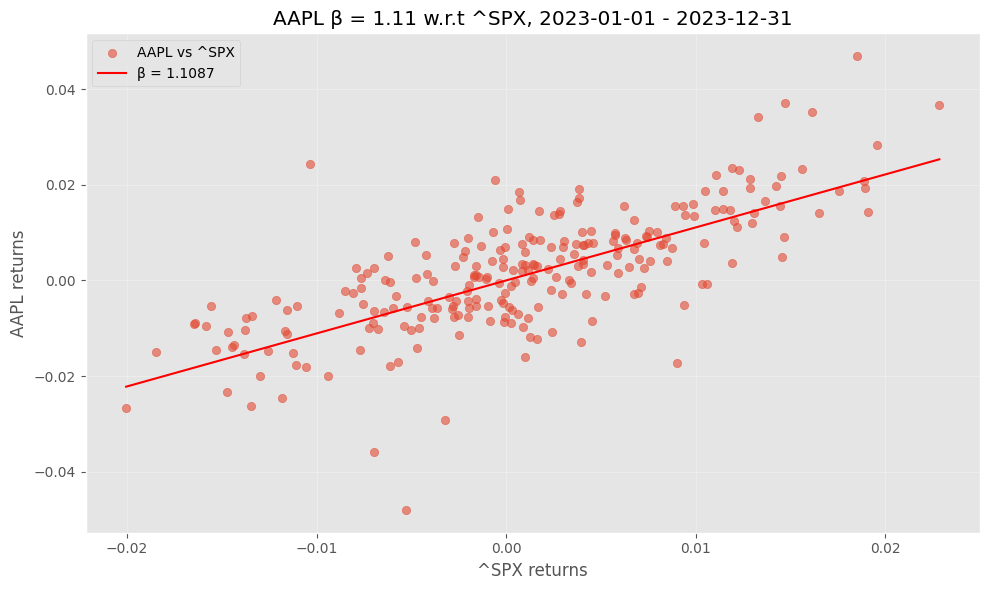

In [47]:
beta_plot('AAPL')

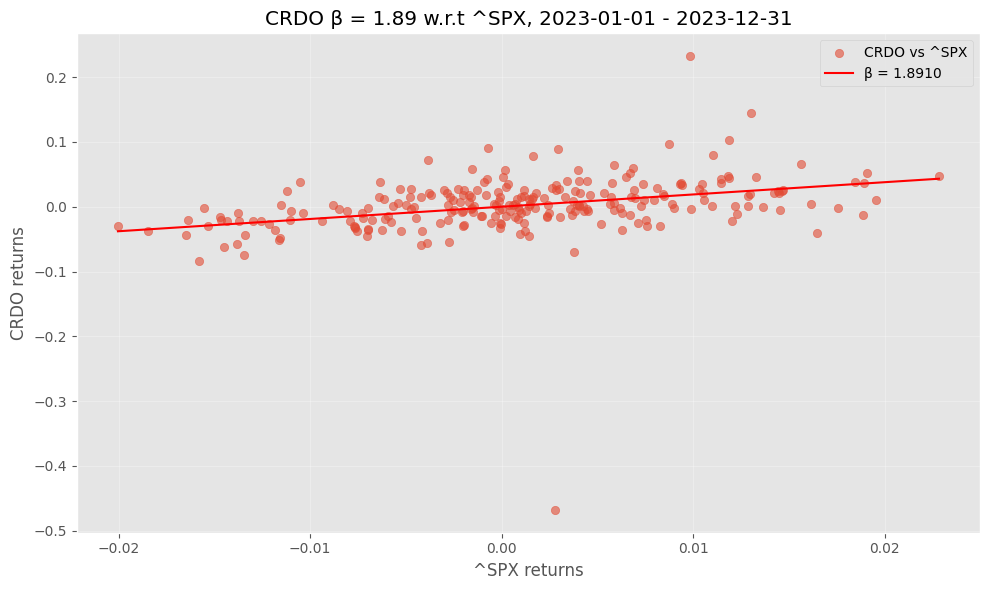

In [55]:
beta_plot("CRDO")

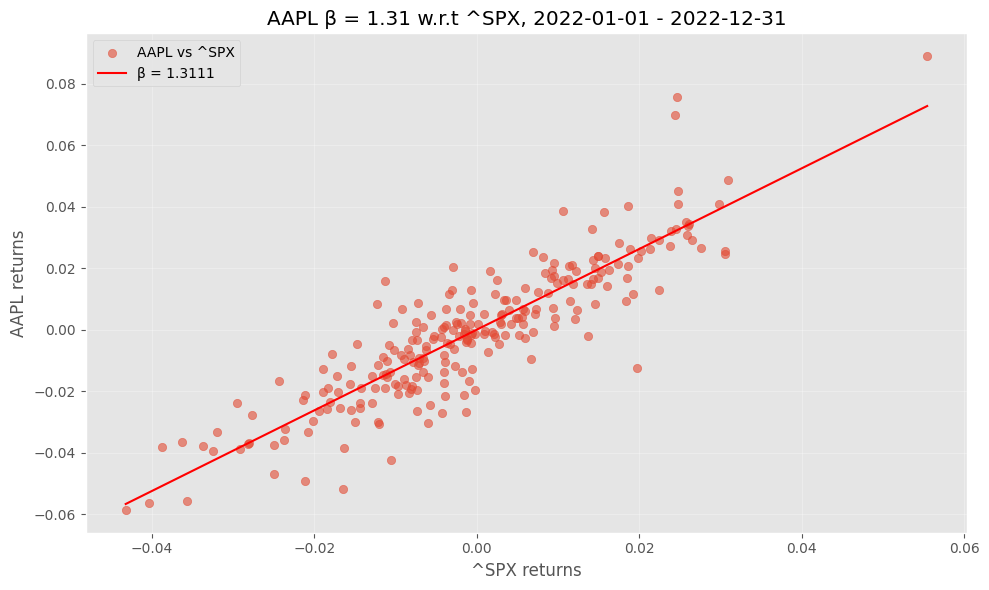

In [49]:
beta_plot('AAPL', '^SPX', '2022-01-01', '2022-12-31')


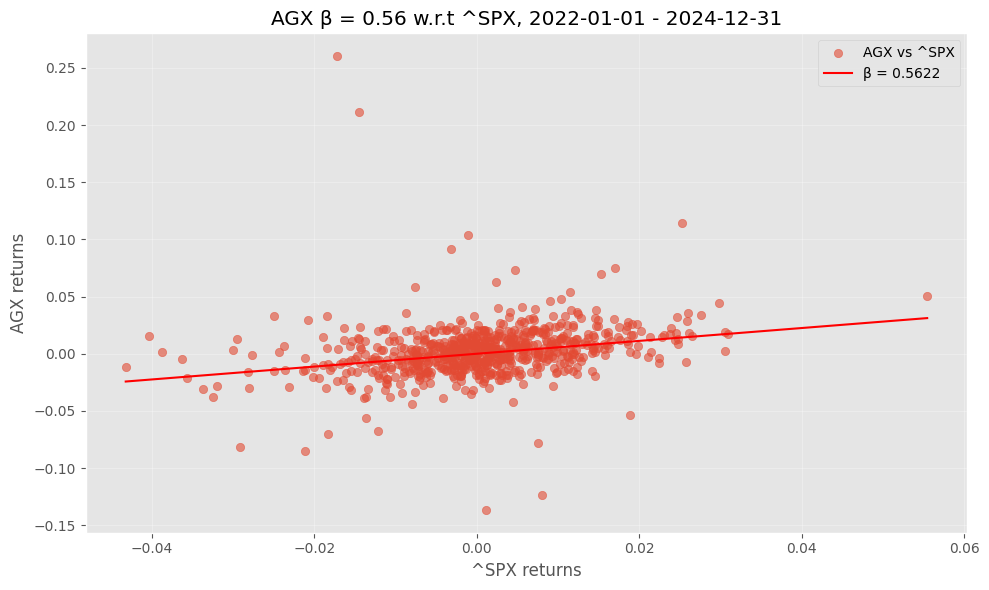

In [50]:
beta_plot('AGX', '^SPX', '2022-01-01', '2024-12-31')


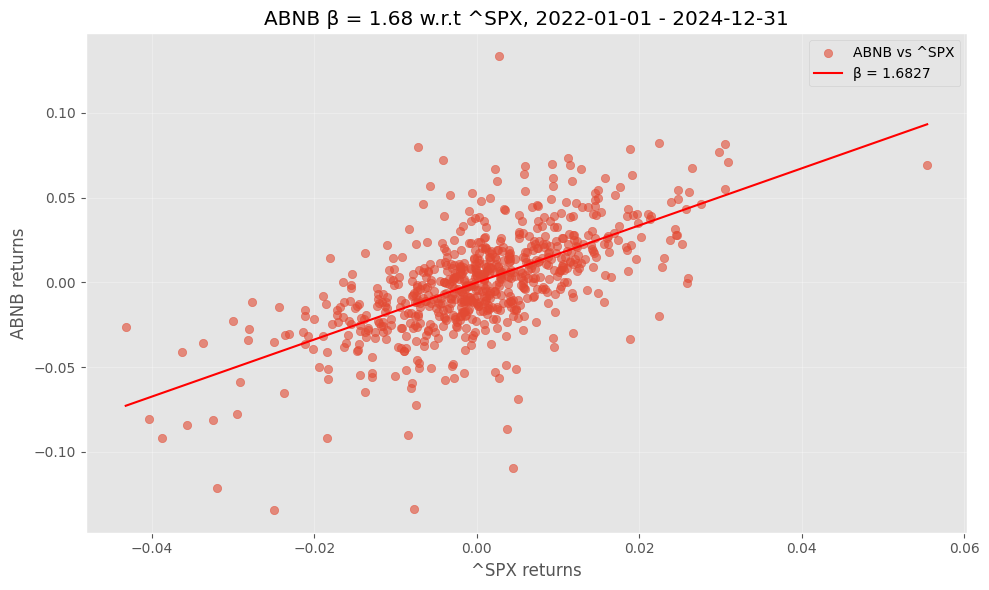

In [51]:
beta_plot('ABNB', '^SPX', '2022-01-01', '2024-12-31')


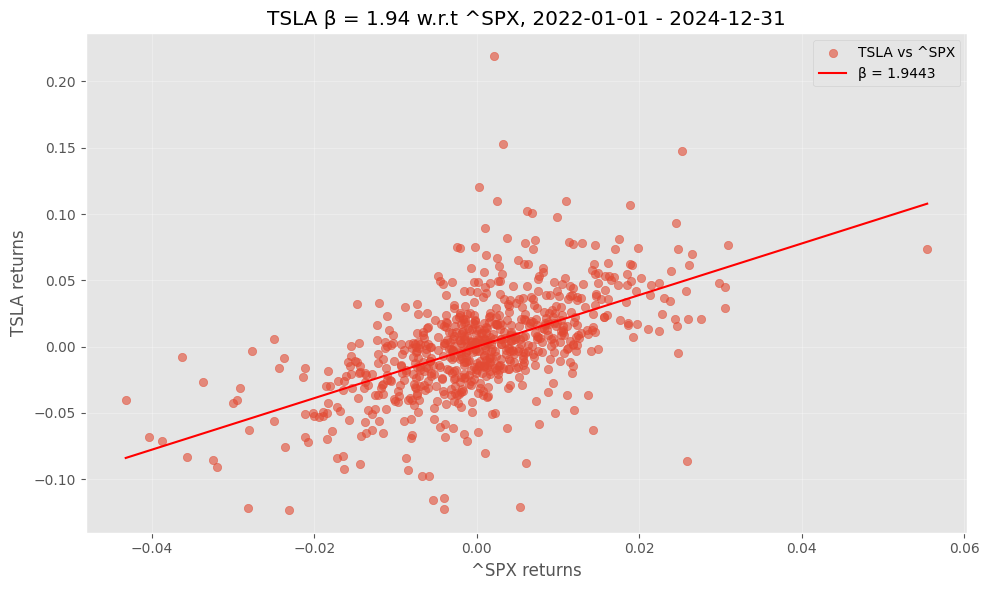

In [52]:
beta_plot('TSLA', '^SPX', '2022-01-01', '2024-12-31')


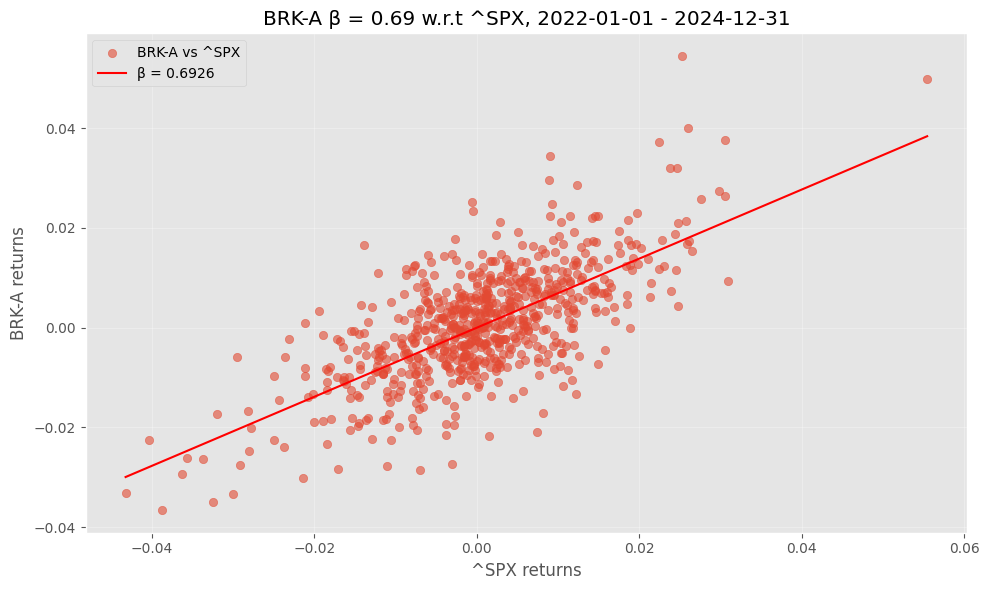

In [54]:
beta_plot('BRK-A', '^SPX', '2022-01-01', '2024-12-31')

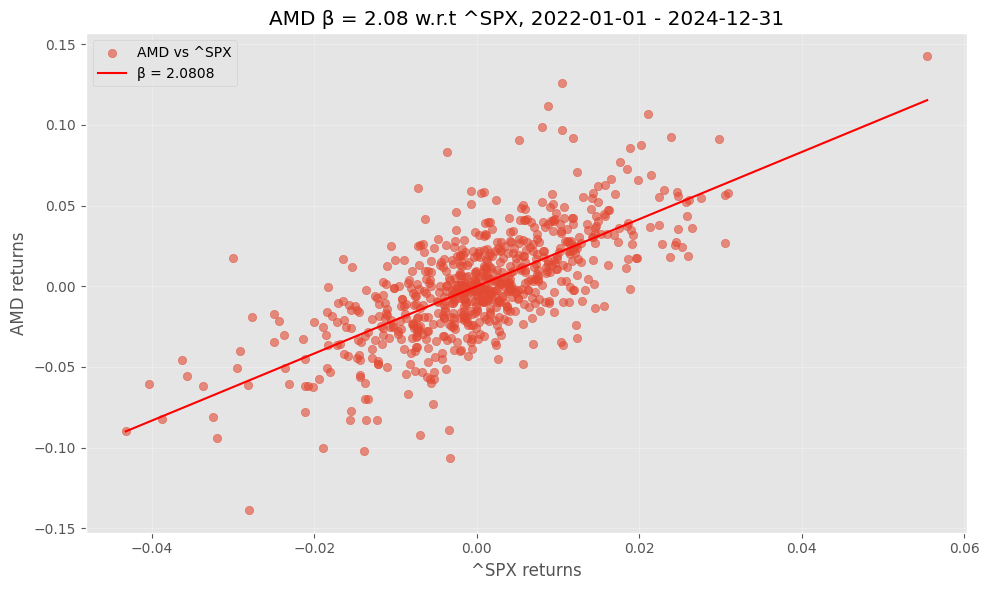

In [71]:
beta_plot('AMD', '^SPX', '2022-01-01', '2024-12-31')

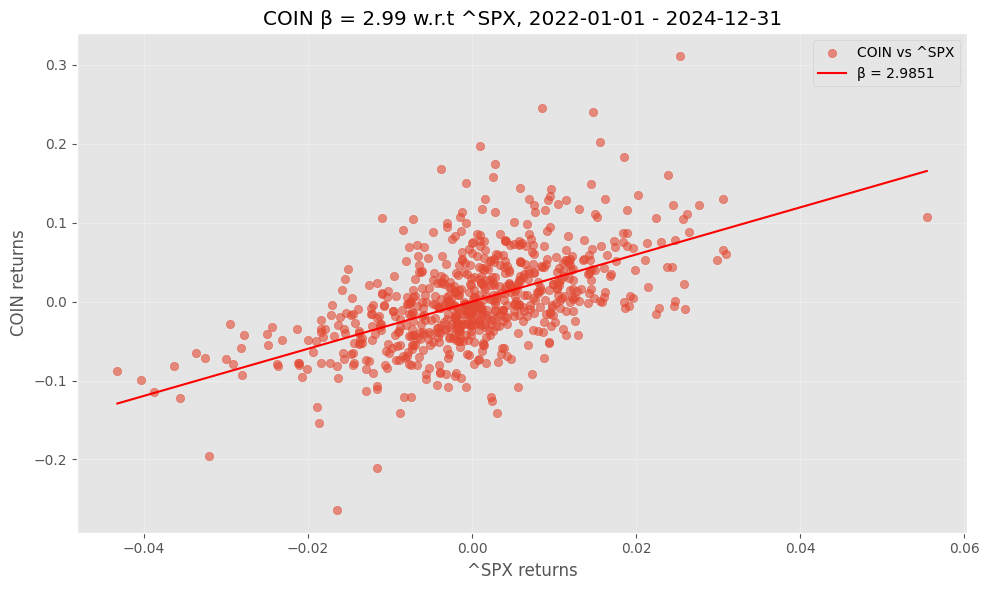

In [72]:
beta_plot('COIN', '^SPX', '2022-01-01', '2024-12-31')

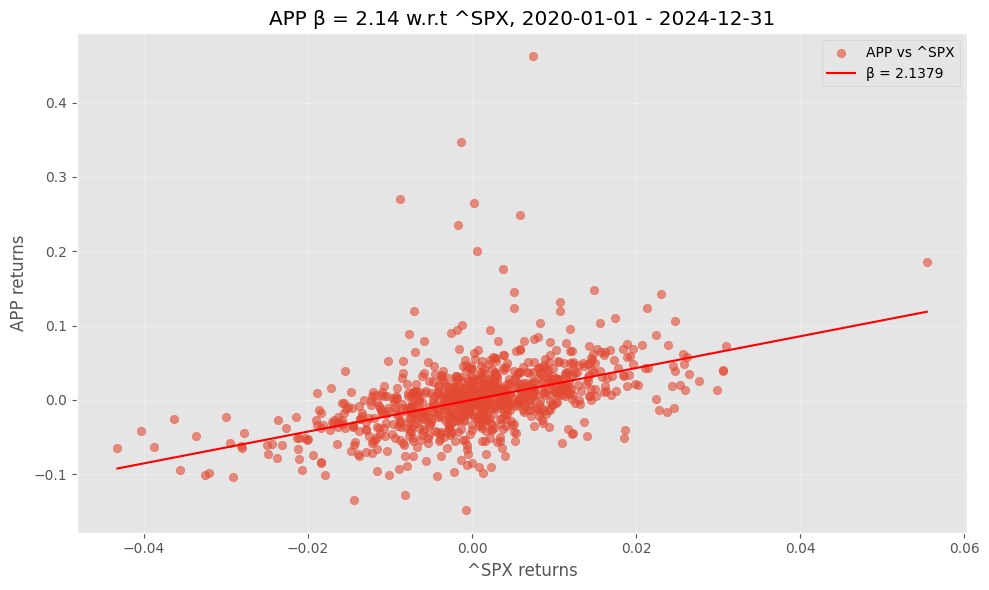

In [70]:
beta_plot('APP', '^SPX', '2020-01-01', '2024-12-31')